**Author:** Ngu (Nathan) Dang

# Edible Mushroom Classifier

### Table of Content

0. [Import Important Libraries](#importing)
1. [Load The Datasets](#loading)
2. [EDA](#eda)
3. [Data Processing](#data-processing)
4. [Modelling & Evaluation](#modelling-eval)
5. [Submission](#submission)
6. [Next Steps](#next-steps)

### Overview

This project is part of 2024 Kaggle Playground Series! The goal of this competition is to predict whether a mushroom is edible or poisonous based on its physical characteristics. The dataset for this competition (both train and test) was generated from a deep learning model trained on the [UCI Mushroom dataset](https://archive.ics.uci.edu/dataset/73/mushroom). The training set contains 3116945 data points; the test set contains 2077964 data points; and there are a total of 22 features. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

More information about the competition can be found [here](https://www.kaggle.com/competitions/playground-series-s4e8/overview)

### References

[1] [[0.97662]🍄Mushroom🌓Classification🎯Analysis](https://www.kaggle.com/code/ouaillaamiri02/0-97662-mushroom-classification-analysis)

[2] [(PlaygroundSeries)The Mushroom Problem(ACC= 99%))](https://www.kaggle.com/code/swarnabh31/playgroundseries-the-mushroom-problem-acc-99)

[3] [Binary Prediction of Poisonous Mushrooms](https://www.kaggle.com/code/danishyousuf19/binary-prediction-of-poisonous-mushrooms#Using-Deep-Learning-for-Training-the-Model)

[4] [Mushroom Classification: 98% Accuracy](https://www.kaggle.com/code/sudhanvahg/mushroom-classification-98-accuracy/notebook)

# 0. Import Important Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout,Input,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


# 1. Load The Datasets

In this section, we load both the training and test sets and examine their dimensions as well as the datatype of each feature.

In [2]:
# Load the Training Set
train_df = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
train_df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [4]:
train_df.groupby('class').describe()

id                                                         \
           count          mean            std  min       25%        50%   
class                                                                     
e      1411549.0  1.558606e+06  899517.300951  0.0  779435.0  1559053.0   
p      1705396.0  1.558361e+06  900006.143573  1.0  779093.5  1557999.5   

                             cap-diameter            ... stem-height         \
              75%        max        count      mean  ...         75%    max   
class                                                ...                      
e      2337049.00  3116943.0    1411548.0  7.142471  ...        7.35  88.72   
p      2338271.75  3116944.0    1705393.0  5.620689  ...        7.51  46.72   

      stem-width                                                        
           count       mean       std  min   25%    50%    75%     max  
class                                                                   
e      1411549.0  12.664778  7.690701  0.0  6.69  12.04  17.49  102.90  
p      1705396.0   9.903143  8.208035  0.0  3.49   7.24  13.68  102.48  

[2 rows x 32 columns]

In [5]:
# Load the Test Set
test_df = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')
test_df.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 332.9+ MB


# 2. EDA

In this section, we perform basic EDA such as examining the distribution of the labels in the training set, examining the unique entries in each feature (which is a very important step because as mentioned in the Competition's Page, the given data is very much unclean and contain a lot of typos), computing the percentage of missing entries in each feature, examining the distribution of numerical features, and lastly, computing the correlation between pairs of features.

Text(0, 0.5, 'Count')

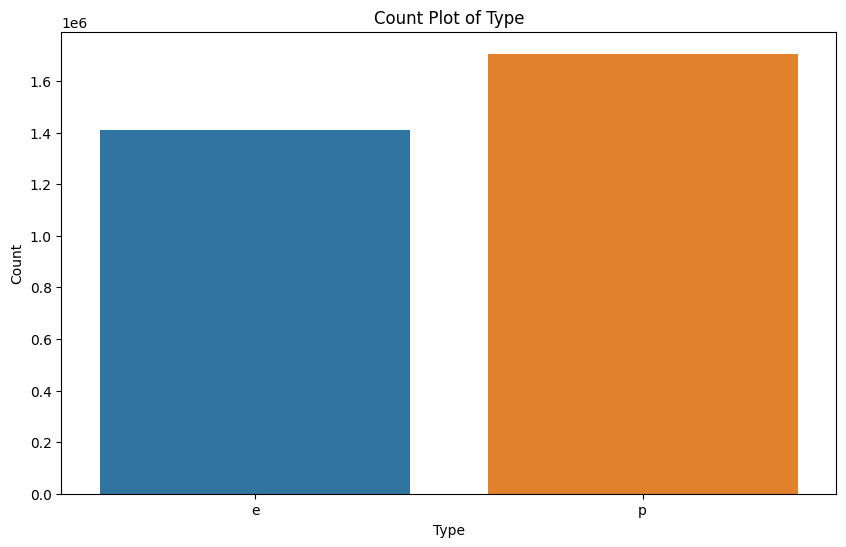

In [7]:
# Create a count plot for the 'Type' column
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=train_df)

# Set title and labels
plt.title('Count Plot of Type')
plt.xlabel('Type')
plt.ylabel('Count')

In [8]:
# List of categorical columns to process
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 'gill-attachment', 'gill-spacing'
                      ,'gill-color', 'stem-root', 'stem-surface','stem-color','veil-type','veil-color','has-ring',
                       'ring-type','spore-print-color','habitat'
                      ] 

In [9]:
# List of numerical columns to process
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']  

In [10]:
# print out values across the columns
for column in categorical_columns:
    print("column : ",column,"\nunique values : ",train_df[column].unique(),"\n")

column :  cap-shape 
unique values :  ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'
 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'
 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'
 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'
 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'
 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'
 '4.33' '2.82' '6.53' '19.06'] 

column :  cap-surface 
unique values :  ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23.18'
 '3.06' '16.39' '4.21' 'veil-color' '11.78' '8.1' 'has-ring' 'does h'
 '1.42' 'class' 'has h' 'does None' '10.83' 'season' '8.96' '14.04' '5.73'
 'is None' '24.38' '2.81' '0.88' '2.11' '2.79' 'ring-type'
 'does-bruise-or-bleed' '4.93' 

In [11]:
# Calculate the percentage of missing values for each feature in the Training Set
train_missing_percentage = train_df.isnull().mean() * 100

# Filter out columns with missing values
train_missing_percentage = train_missing_percentage[train_missing_percentage > 0]

# Display the missing values percentage
print("Columns with missing values and their percentage in Training Set:")
print(train_missing_percentage)

Columns with missing values and their percentage in Training Set:
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
dtype: float64


In [12]:
# Calculate the percentage of missing values for each feature
test_missing_percentage = test_df.isnull().mean() * 100

# Filter out columns with missing values
test_missing_percentage = test_missing_percentage[test_missing_percentage > 0]

# Display the missing values percentage
print("Columns with missing values and their percentage in Test Set:")
print(test_missing_percentage)

Columns with missing values and their percentage in Test Set:
cap-diameter             0.000337
cap-shape                0.001492
cap-surface             21.506821
cap-color                0.000626
does-bruise-or-bleed     0.000481
gill-attachment         16.834796
gill-spacing            40.404694
gill-color               0.002358
stem-height              0.000048
stem-root               88.452543
stem-surface            63.595327
stem-color               0.001011
veil-type               94.878689
veil-color              87.880445
has-ring                 0.000914
ring-type                4.148051
spore-print-color       91.417224
habitat                  0.001203
dtype: float64


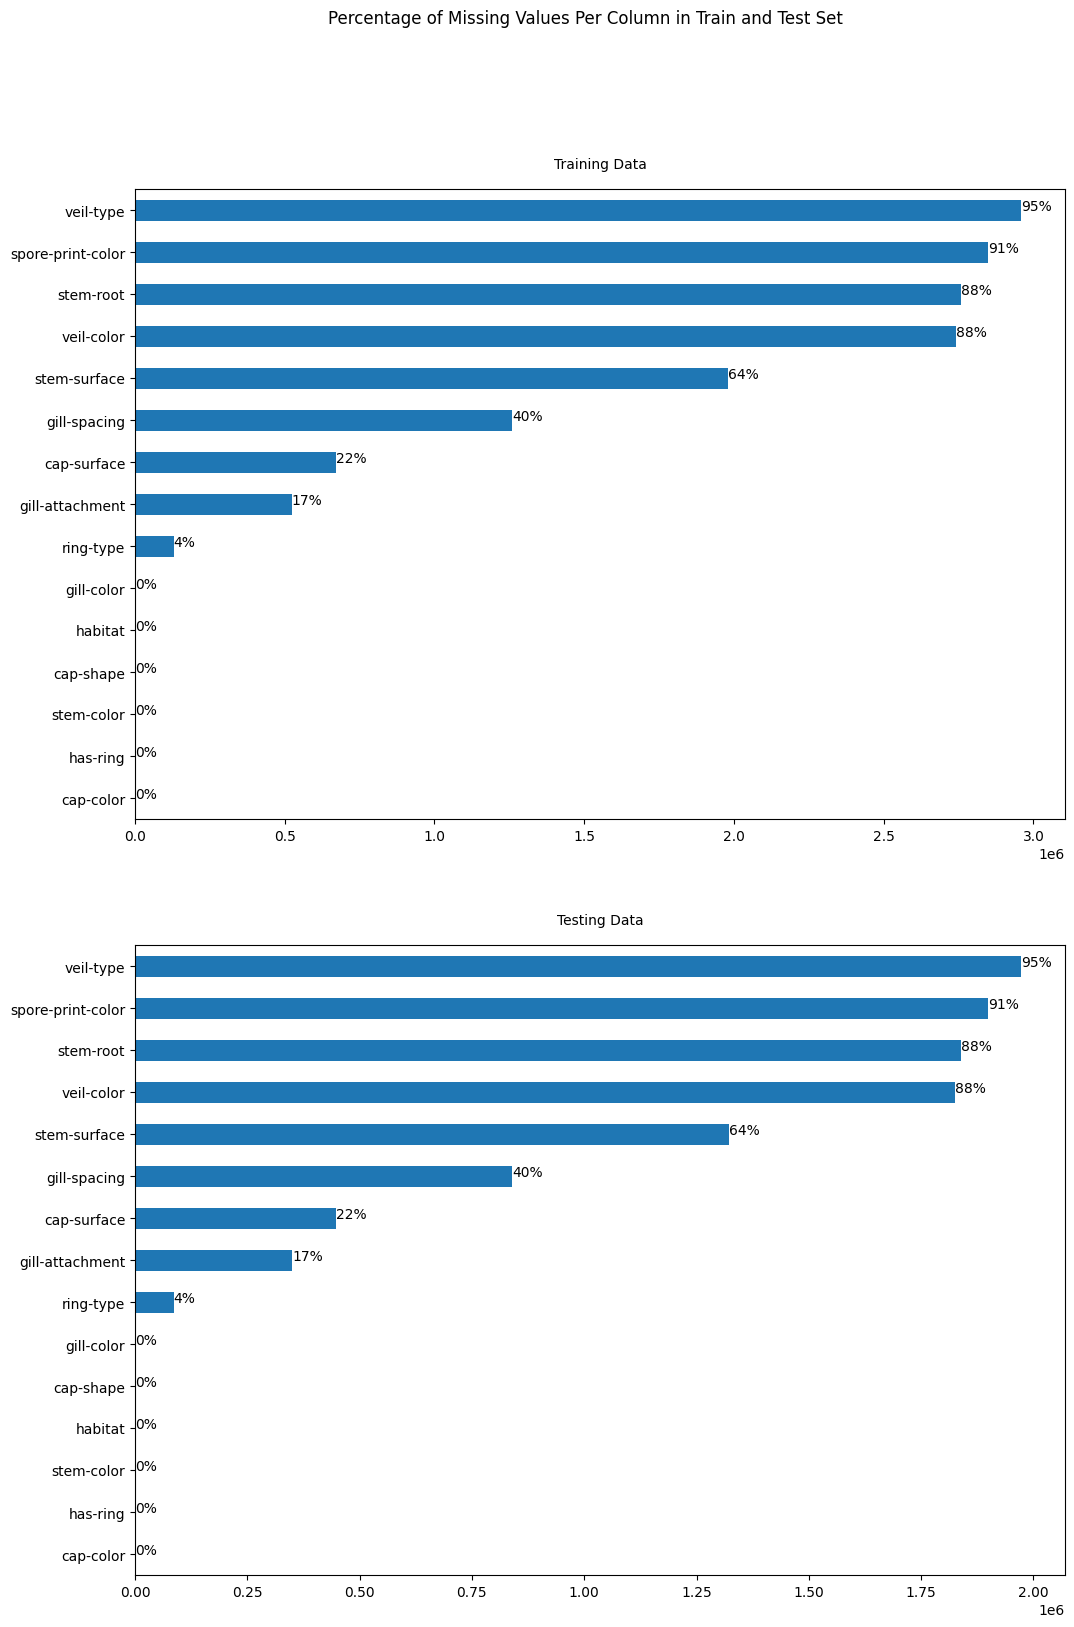

In [13]:
# Plot missing values in train and test set
fig = plt.figure(figsize=(12, 18))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = train_df.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh')
for p in ax1.patches:
    percentage = '{:,.0f}%'.format((p.get_width()/train_df.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax1.annotate(percentage,(x,y))
ax1.set_title('Training Data', y = 1.02, fontsize = 10)  
    
ax2 = fig.add_subplot(2, 1, 2)
ax2 = test_df.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh')
for p in ax2.patches:
    percentage = '{:,.0f}%'.format((p.get_width()/test_df.shape[0])*100)
    width, height = p.get_width(),p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax2.annotate(percentage,(x,y))
ax2.set_title('Testing Data', y = 1.02, fontsize = 10)  
    
plt.suptitle('Percentage of Missing Values Per Column in Train and Test Set', fontdict={'size':25})
plt.show()

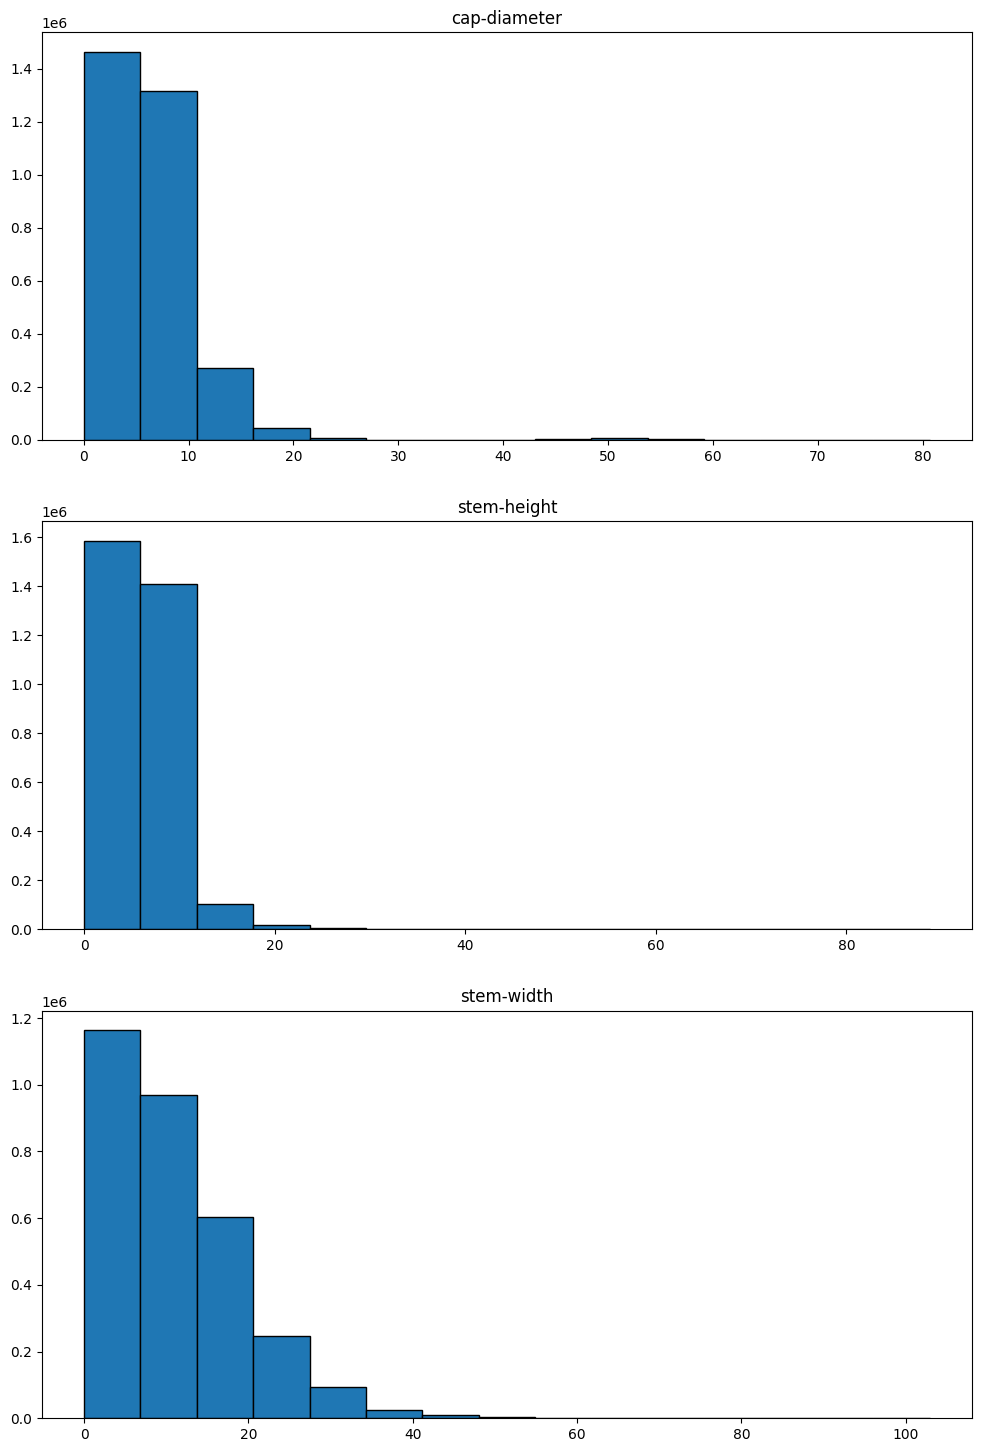

In [14]:
# examine the distribution of the numerical features
f,ax = plt.subplots(3, 1, figsize=(12,18))
for i,ax in zip(numerical_columns, ax.reshape(-1)):
    ax.set_title(i)
    ax.hist(data=train_df, x=i, edgecolor='black', bins=15)
plt.show()

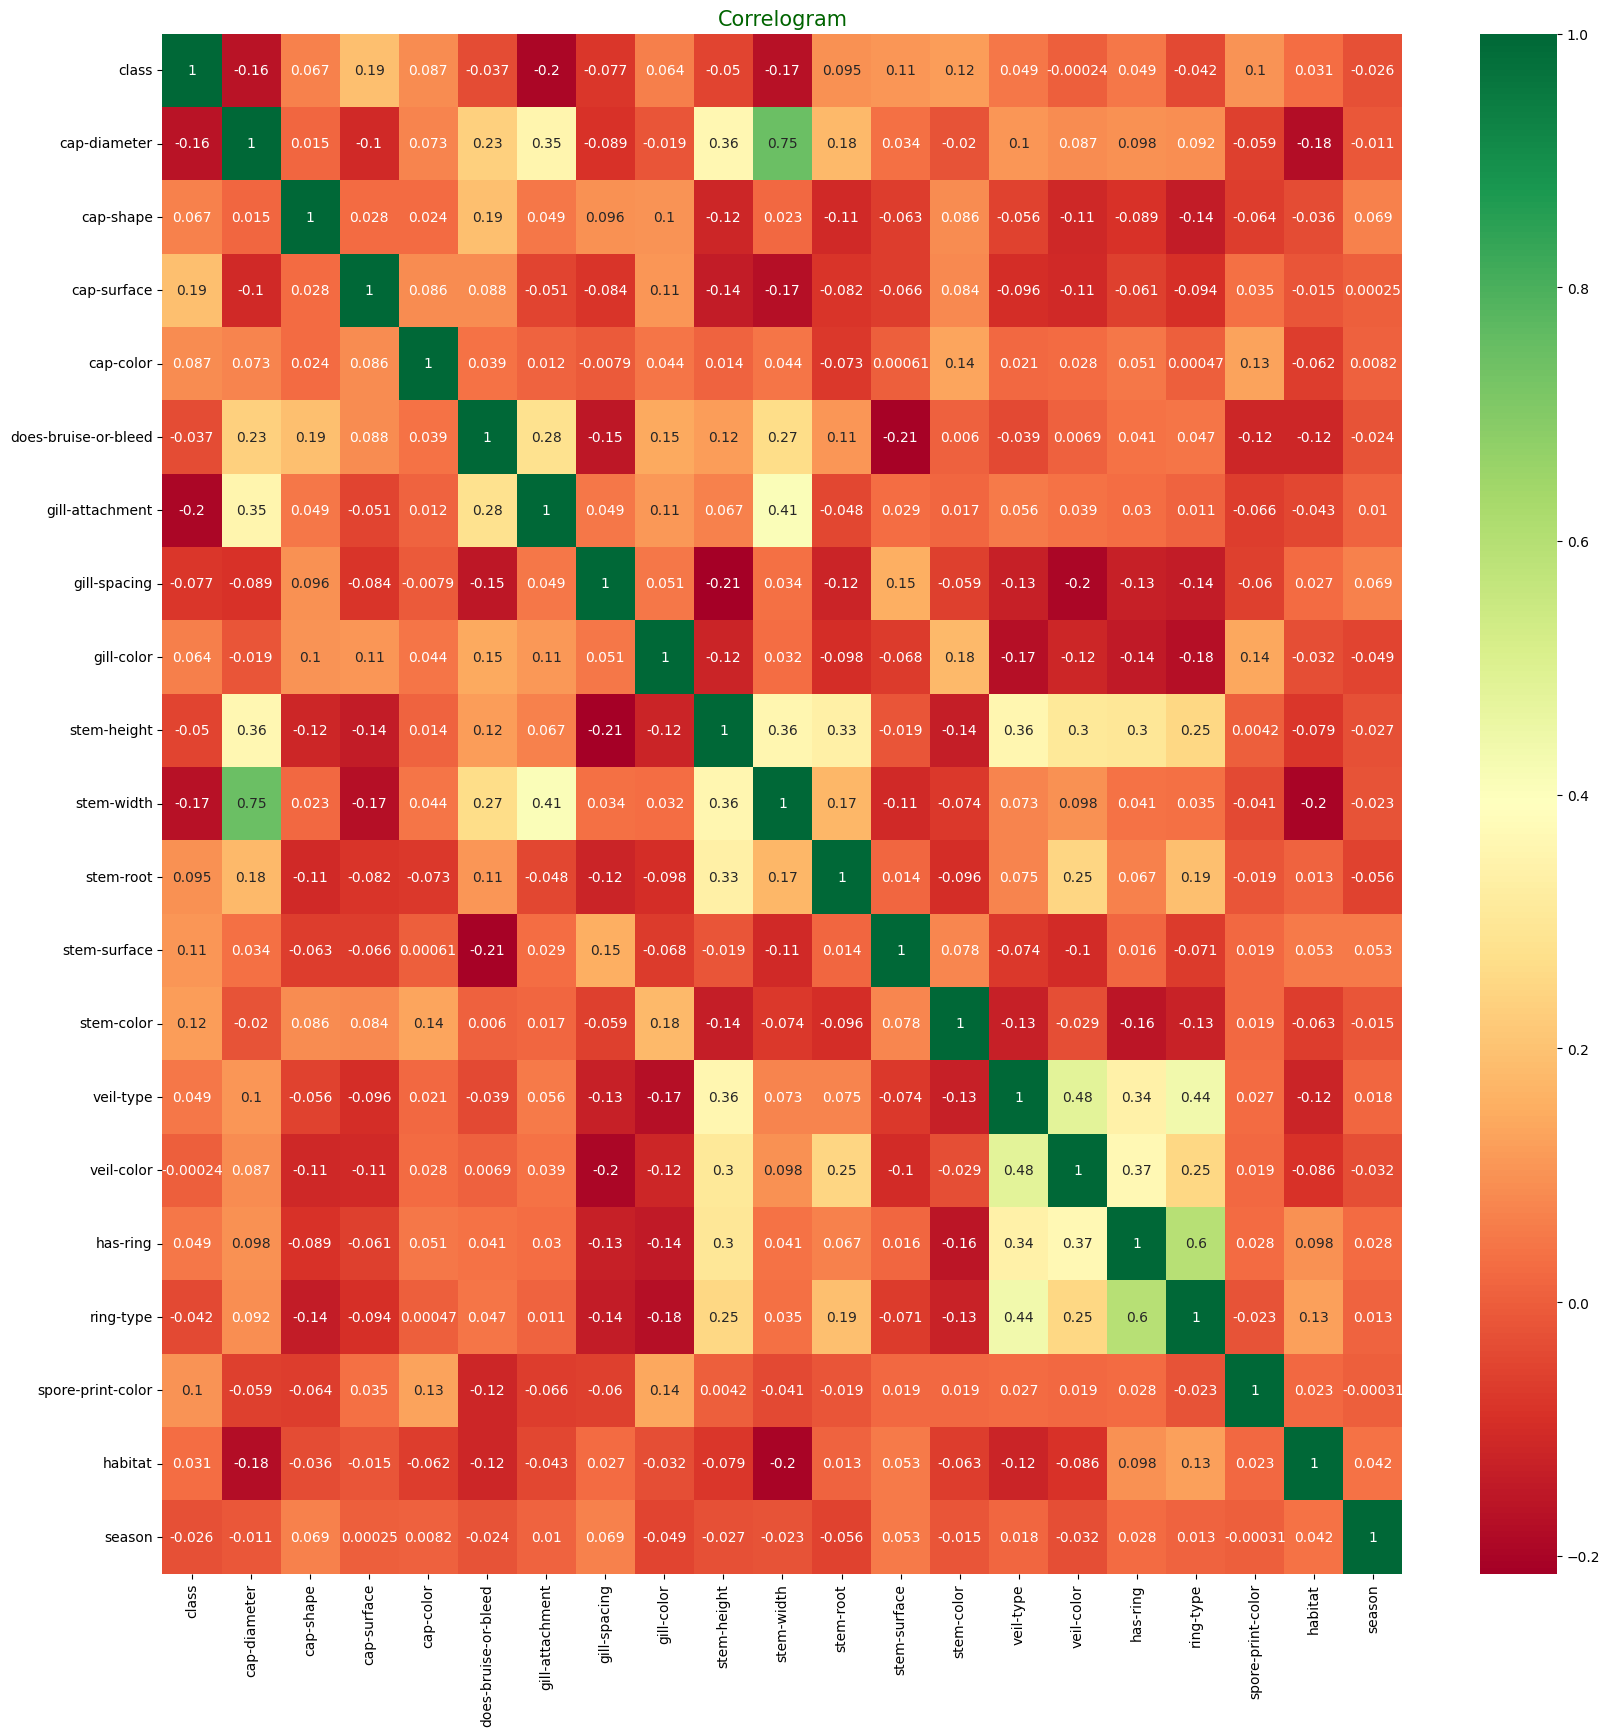

In [15]:
# Visualize correlation between pairs of variables
plt.figure(figsize=(20,20))
temp = train_df.dropna()
temp = train_df.drop('id',axis=1)
temp = temp.apply(lambda x : pd.factorize(x)[0] if x.dtype=='object'else x)
sns.heatmap(temp.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

**EDA Summary:**

- The training labels are a little imbalance, there are slightly more entries labeled as poisonous (p) compared to the entries labeled as edible (e).

- Most (if not all) features contain illegal entries, e.g. some categorical features contain numerical entries.

- The numerical features are very right skewed.

- 'stem-root', 'stem-surface','veil-type', 'veil-color', 'spore-print-color' are features that contain > 50% of missing entries.

- Most of pairs of features are not highly correlated to one another.

# 3. Data Processing

In this section, we perform basic data processing based on our EDA Summary from the previous section. Specifically, we replace illegal entries in categorical entries with the mode value, replace NaN entries in the numerical features with the median, perform encoding for categorical features, and finally scale the features appropriately.

In [16]:
# save the est ids for submission
test_ids = test_df['id']

# drop the id column in both sets as it's clearly insignificant
train_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)

In [17]:
# pick out the categorical columns that have > 50% missing values to drop
columns_to_drop = ['stem-root', 'stem-surface','veil-type', 'veil-color', 'spore-print-color']

In [18]:
# drop the columns from both train and test sets
train_df = train_df.drop(columns_to_drop, axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)

In [19]:
# List of categorical columns to process
for col in columns_to_drop:
    categorical_columns.remove(col)

In [20]:
# pick out the columns that have typos to fix
columns_to_clean = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
    'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 
    'has-ring', 'ring-type', 'habitat'
]

In [21]:
# Define valid categories for each column
valid_categories = {
    'cap-shape': ['f', 'x', 'p', 'b', 'o', 'c', 's'],
    'cap-surface': ['s', 'h', 'y', 'l'],
    'cap-color': ['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k'],
    'does-bruise-or-bleed': ['f', 't'],
    'gill-attachment': ['a', 'x', 's', 'd'],
    'gill-spacing': ['c', 'd'],
    'gill-color': ['w', 'n', 'g', 'k'],
    'stem-color': ['w', 'o', 'n', 'y', 'e'],
    'has-ring': ['f', 't'],
    'ring-type': ['f', 'z', 'e', 'p'],
    'habitat': ['d', 'l', 'g', 'h', 'p', 'm', 'u']
}

In [22]:
# Replace typos/unexpected values with NaN
for col in columns_to_clean:
    train_df[col] = train_df[col].apply(lambda x: x if x in valid_categories[col] else np.nan)
    test_df[col] = test_df[col].apply(lambda x: x if x in valid_categories[col] else np.nan)

In [23]:
# Loop through each numerical column and impute missing values with the median
for col in numerical_columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(test_df[col].median())

In [24]:
# Loop through each categorical column and impute missing values with the mode
for col in categorical_columns:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [25]:
train_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w
3,e,3.88,f,y,g,f,s,c,g,4.16,6.53,w,f,f,d,u
4,e,5.85,x,l,w,f,d,c,w,3.37,8.36,w,f,f,g,a


In [26]:
test_df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.64,x,s,n,t,a,c,w,11.13,17.12,w,t,f,d,a
1,6.90,o,s,o,f,a,c,w,1.27,10.75,n,f,f,d,a
2,2.00,b,s,n,f,a,c,n,6.18,3.14,n,f,f,d,s
3,3.47,x,s,n,f,s,c,n,4.98,8.51,w,t,z,d,u
4,6.17,x,h,y,f,a,c,w,6.73,13.70,y,t,f,d,u


In [27]:
# List of columns for One-Hot Encoding
ohe_columns = ['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment', 'gill-spacing', 
               'gill-color', 'ring-type', 'habitat', 'season', 'stem-color']

# List of columns for Label Encoding
le_columns = ['does-bruise-or-bleed', 'has-ring']

# Initialize encoders
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
le = LabelEncoder()

# Function to apply encoding
def apply_encoding(df, train=True):
    # One-Hot Encoding
    ohe_encoded = ohe.fit_transform(df[ohe_columns]) if train else ohe.transform(df[ohe_columns])
    ohe_feature_names = ohe.get_feature_names_out(ohe_columns)
    df_ohe = pd.DataFrame(ohe_encoded, columns=ohe_feature_names, index=df.index)
    
    # Label Encoding
    for col in le_columns:
        df[col] = le.fit_transform(df[col]) if train else le.transform(df[col])
    
    # Combine encoded features with original dataframe
    df_encoded = pd.concat([df.drop(columns=ohe_columns), df_ohe], axis=1)
    
    return df_encoded

# Apply encoding to training data
train_df = apply_encoding(train_df, train=True)

# Apply encoding to test data
test_df = apply_encoding(test_df, train=False)

In [28]:
def suggest_scaler(train_set, test_set):
    suggestions = {}
    
    # Identify numerical columns (should be the same in both train and test)
    num_columns = train_set.select_dtypes(include=[np.number]).columns.tolist()
    
    for col in num_columns:
        # Combine train and test data for analysis
        data = np.concatenate([train_set[col].values, test_set[col].values])
        
        # Check for outliers using IQR method
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        outlier_ratio = np.sum((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))) / len(data)
        
        # Check for normality using Shapiro-Wilk test
        _, p_value = stats.shapiro(data[:5000])  # Using first 5000 samples for efficiency
        
        # Calculate skewness
        skewness = stats.skew(data)
        
        # Determine suggestion
        if outlier_ratio > 0.1:  # More than 10% outliers
            suggestions[col] = "RobustScaler"
        elif p_value > 0.05:  # Data is likely normally distributed
            suggestions[col] = "StandardScaler"
        elif abs(skewness) > 1:  # Data is highly skewed
            suggestions[col] = "MinMaxScaler"
        else:
            suggestions[col] = "StandardScaler"
    
    return suggestions

def apply_custom_scaling(train_set, test_set):
    scaler_suggestions = suggest_scaler(train_set, test_set)
    
    scalers = {
        "StandardScaler": StandardScaler(),
        "MinMaxScaler": MinMaxScaler(),
        "RobustScaler": RobustScaler()
    }
    
    for col, scaler_name in scaler_suggestions.items():
        scaler = scalers[scaler_name]
        train_set[col] = scaler.fit_transform(train_set[[col]])
        test_set[col] = scaler.transform(test_set[[col]])
    
    return train_set, test_set

# Apply scaling to both training and test data
train_df, test_df = apply_custom_scaling(train_df, test_df)

# Print the scaler used for each column
scaler_suggestions = suggest_scaler(train_df, test_df)
print("Scalers used for each column:")
for col, scaler in scaler_suggestions.items():
    print(f"{col}: {scaler}")

Scalers used for each column:
cap-diameter: MinMaxScaler
does-bruise-or-bleed: RobustScaler
stem-height: MinMaxScaler
stem-width: MinMaxScaler
has-ring: RobustScaler
cap-shape_b: RobustScaler
cap-shape_c: MinMaxScaler
cap-shape_f: RobustScaler
cap-shape_o: MinMaxScaler
cap-shape_p: MinMaxScaler
cap-shape_s: RobustScaler
cap-shape_x: StandardScaler
cap-surface_h: MinMaxScaler
cap-surface_l: MinMaxScaler
cap-surface_s: RobustScaler
cap-surface_y: RobustScaler
cap-color_b: MinMaxScaler
cap-color_e: MinMaxScaler
cap-color_g: MinMaxScaler
cap-color_k: MinMaxScaler
cap-color_n: StandardScaler
cap-color_o: MinMaxScaler
cap-color_p: MinMaxScaler
cap-color_r: MinMaxScaler
cap-color_u: MinMaxScaler
cap-color_w: RobustScaler
cap-color_y: RobustScaler
gill-attachment_a: StandardScaler
gill-attachment_d: RobustScaler
gill-attachment_s: MinMaxScaler
gill-attachment_x: RobustScaler
gill-spacing_c: RobustScaler
gill-spacing_d: RobustScaler
gill-color_g: MinMaxScaler
gill-color_k: MinMaxScaler
gill-col

In [29]:
# Extract the features and the labels separately
X = train_df.drop(columns=['class'], axis=1)
y = train_df['class']

In [30]:
# Encode the target variable using label encoder
y = le.fit_transform(y)

In [31]:
# Split the full training dataset into training and validating sets
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=train_df['class']
                                                   )
X_test = test_df

In [32]:
X_train.head()

,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,...,habitat_u,season_a,season_s,season_u,season_w,stem-color_e,stem-color_n,stem-color_o,stem-color_w,stem-color_y
586767,0.061012,0.0,0.042831,0.120117,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.009770,0.0,-0.766524,0.0,0.0,-0.689052,0.0,-0.978494,1.0
2665706,0.017857,0.0,0.058950,0.030029,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.990325,0.0,1.304591,0.0,0.0,-0.689052,0.0,1.021978,0.0
1270574,0.127232,0.0,0.080816,0.199903,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.009770,0.0,-0.766524,0.0,0.0,-0.689052,0.0,1.021978,0.0
2935630,0.092014,1.0,0.069883,0.085811,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.009770,0.0,-0.766524,0.0,1.0,-0.689052,0.0,-0.978494,0.0
3113991,0.067088,0.0,0.036407,0.119436,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.009770,0.0,-0.766524,0.0,0.0,-0.689052,0.0,-0.978494,1.0


In [33]:
X_val.head()

,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,...,habitat_u,season_a,season_s,season_u,season_w,stem-color_e,stem-color_n,stem-color_o,stem-color_w,stem-color_y
1745452,0.049231,0.0,0.085099,0.068610,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-0.990325,1.0,-0.766524,0.0,0.0,-0.689052,1.0,-0.978494,0.0
288331,0.114955,0.0,0.056357,0.257823,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.990325,0.0,1.304591,0.0,0.0,1.451270,0.0,-0.978494,0.0
421615,0.108011,0.0,0.030658,0.178426,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-0.990325,0.0,-0.766524,1.0,0.0,-0.689052,0.0,1.021978,0.0
2794259,0.046131,1.0,0.048129,0.058017,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.990325,0.0,1.304591,0.0,0.0,-0.689052,0.0,1.021978,0.0
78948,0.189360,0.0,0.054441,0.222546,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.990325,0.0,1.304591,0.0,0.0,-0.689052,0.0,1.021978,0.0


In [34]:
X_test.head()

,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,...,habitat_u,season_a,season_s,season_u,season_w,stem-color_e,stem-color_n,stem-color_o,stem-color_w,stem-color_y
0,0.106771,1.0,0.125451,0.166375,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.009770,0.0,-0.766524,0.0,0.0,-0.689052,0.0,1.021978,0.0
1,0.085193,0.0,0.014315,0.104470,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.009770,0.0,-0.766524,0.0,0.0,1.451270,0.0,-0.978494,0.0
2,0.024430,0.0,0.069657,0.030515,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.990325,1.0,-0.766524,0.0,0.0,1.451270,0.0,-0.978494,0.0
3,0.042659,0.0,0.056132,0.082702,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.990325,0.0,1.304591,0.0,0.0,-0.689052,0.0,1.021978,0.0
4,0.076141,0.0,0.075857,0.133139,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.990325,0.0,1.304591,0.0,0.0,-0.689052,0.0,-0.978494,1.0


In [35]:
print("Training Set Dimension:", X_train.shape)
print("Validating Set Dimension:", X_val.shape)
print("Test Set Dimension:", X_test.shape)

Training Set Dimension: (2493556, 57)
Validating Set Dimension: (623389, 57)
Test Set Dimension: (2077964, 57)


# 4. Modelling & Evaluation

In this section, we train a Random Forest Classifier and evaluate it based on accuracy score and confusion matrix.

In [36]:
# Initialize the Random Foret Classifier model with appropriate solver
rf_model = RandomForestClassifier(random_state=42)

In [37]:
# Train the RF model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
def evaluate(model):
    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)
    
    return y_pred, accuracy, report

In [39]:
# evaluate the RF Model
rf_pred, rf_acc, rf_report = evaluate(rf_model)

In [40]:
print("accuracy of the RF Model: ", rf_acc)

accuracy of the RF Model:  0.9872439199280064


In [41]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    282310
           1       0.99      0.99      0.99    341079

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



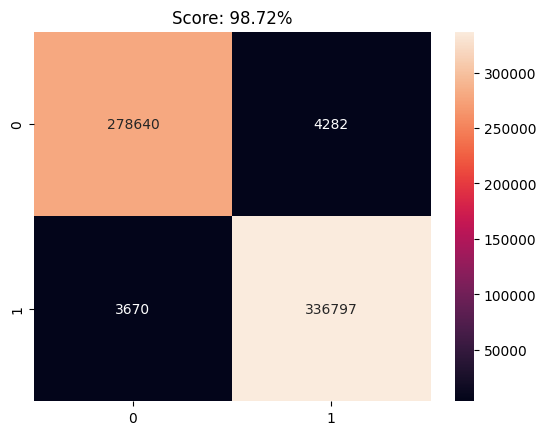

In [42]:
sns.heatmap(confusion_matrix(rf_pred, y_val), annot=True, fmt='d')
plt.title("Score: {}%".format(round(rf_acc*100, 2)))
plt.show()

# 5. Submission

In this section, we apply our trained model on the test set and extract the submisison file.

In [49]:
# Make predictions on test set
y_test_pred = rf_model.predict(X_test)

In [50]:
# Convert numerical predictions back to original labels
# y_test_pred_labels = np.where(y_test_pred == 1, 'p', 'e')
y_test_pred_labels = le.inverse_transform(y_test_pred)

In [51]:
# Create submission dataframe
submission = pd.DataFrame({
    'id': test_ids,
    'class': y_test_pred_labels
})

In [52]:
# Check the first few rows of the submission file
print(submission.head())

# Save submission file
submission.to_csv('submission.csv', index=False)

        id class
0  3116945     e
1  3116946     p
2  3116947     p
3  3116948     p
4  3116949     e


# 6. Next Steps

An obvious next step is to fine-tune the parameters for the Random Forest Classifier. Another useful thing to try is comparing the performance of Random Forest with other models such as XGB and Neural Network. Lastly, we can take the suggestion from the Competition's page by using the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.